#  Project One

***

Welcome to the first Python session!

In this project, we will estimate the value of  <span style="color:red; font-size:2em;" >$\pi$</span>.

If we only have a magic box that will sample a number from the range [0,1] uniformily.  
we can use this magic box to ESTIMATE the value of <span style="color:red; " >$\pi$</span>.  


## How to esitimate

we can sample two points x,y from the magic box

if we consider (x,y) as a cartesian coordinate, we can draw a point in a plane

if we draw a circle in the plane, and count how many points lies inside the circle, we can approximate the value of $\pi$

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:

import matplotlib
import matplotlib.pyplot as plt
from random import Random
import numpy as np


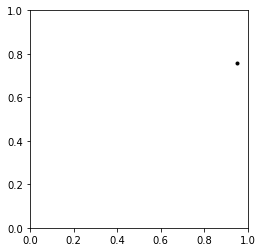

In [3]:
plt.scatter(np.random.uniform(0, 1),np.random.uniform(0, 1), marker='.', color='black',zorder=10)
plt.axis('scaled')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.show()


### Repeat the sampling process and sample 100 points

In [28]:
points = []

number = 1000000
for i in range(number):
    points.append([np.random.uniform(0, 1),np.random.uniform(0, 1)])


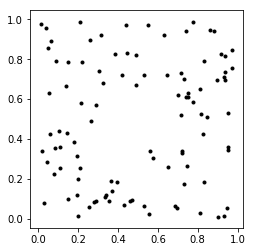

In [5]:
plt.scatter(*zip(*points[0:100]), marker='.', color='black',zorder=10)
plt.axis('scaled')
plt.show()

## Let's draw a square and circle for visulazation

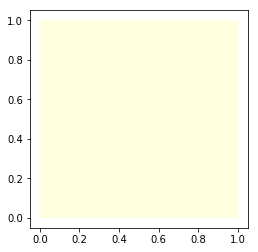

In [6]:
ax = plt.gca()
rectangle = matplotlib.patches.Rectangle((0, 0),1,1, fc='lightyellow')
ax.add_patch(rectangle)
plt.axis('scaled')
plt.show()

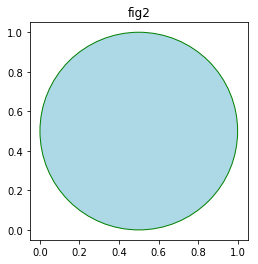

In [7]:
figure, ax = plt.subplots()
circle = matplotlib.patches.Circle( (0.5,0.5 ),0.5, fc='lightblue',ec="green" )
ax.add_patch( circle )
plt.title( 'fig2' )
plt.axis('scaled')
plt.show()

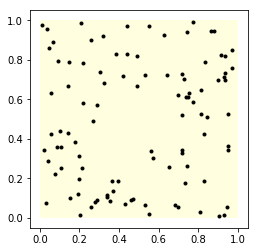

In [8]:


figure, ax = plt.subplots()
rectangle = matplotlib.patches.Rectangle((0, 0),1,1, fc='lightyellow')
ax.add_patch(rectangle)

plt.scatter(*zip(*points[0:100]), marker='.', color='black',zorder=10)

plt.axis('scaled')
plt.show()

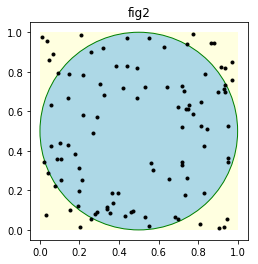

In [9]:
figure, ax = plt.subplots()
circle = plt.Circle( (0.5,0.5 ),0.5, fc='lightblue',ec="green" )
rectangle = matplotlib.patches.Rectangle((0, 0),1,1, fc='lightyellow')

ax.add_patch( rectangle )
ax.add_patch( circle )
plt.plot(*zip(*points[0:100]), marker='.', color='black',ls='')

plt.title( 'fig2' )
plt.axis('scaled')
plt.show()

## Check the distance of each points to the center of the circle

Mark points inside the circle green and outside red.

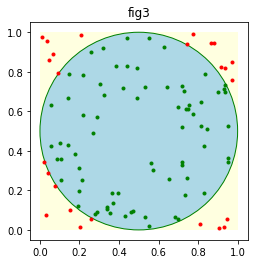

In [10]:
figure, ax = plt.subplots()
circle = plt.Circle( (0.5,0.5 ),0.5, fc='lightblue',ec="green" )
  
ax.add_patch( matplotlib.patches.Rectangle((0, 0),1,1, fc='lightyellow') )

ax.add_patch( circle )

points_inside =[[x,y] for [x,y] in points[0:100] if (abs(x-0.5)**2 + abs(y-0.5)**2) <= 0.5**2]
points_outside = [[x,y] for [x,y] in points[0:100] if (abs(x-0.5)**2 + abs(y-0.5)**2) > 0.5**2]

plt.plot(*zip(*points_inside), marker='.', color='green',ls='')
plt.plot(*zip(*points_outside), marker='.', color='red',ls='')

plt.title( 'fig3' )
plt.axis('scaled')
plt.show()


### count the number of points lies within the circle

In [11]:
inside = len([[x,y] for [x,y] in points[0:100] if (abs(x-0.5)**2 + abs(y-0.5)**2) <= 0.5**2])
print(inside)

75


### count the number of points lies outside of the circle


In [12]:
outside = len([[x,y] for [x,y] in points[0:100] if (abs(x-0.5)**2 + abs(y-0.5)**2) > 0.5**2])
print(outside)

25


## Calculate pi

We know the equation for the area of a circle with radius r is $\pi \times r_{circle}^2$  
And the area of a rectangle is $r_{rect}^2$

The points are sampled uniformly from [0,1]

Therefore the probability of a point lies inside the circle is $\frac{points_{inside}}{total}$

we have  $\frac{points_{inside}}{total}$ =  $\frac{\pi \times {r_{circle}}^2}{{r_{rect}}^2}$

In [13]:

my_pi = inside/100 / (0.5**2)
print (my_pi)

3.0


## Lets see how our estimation converge to the real value of pi

<IPython.core.display.Javascript object>


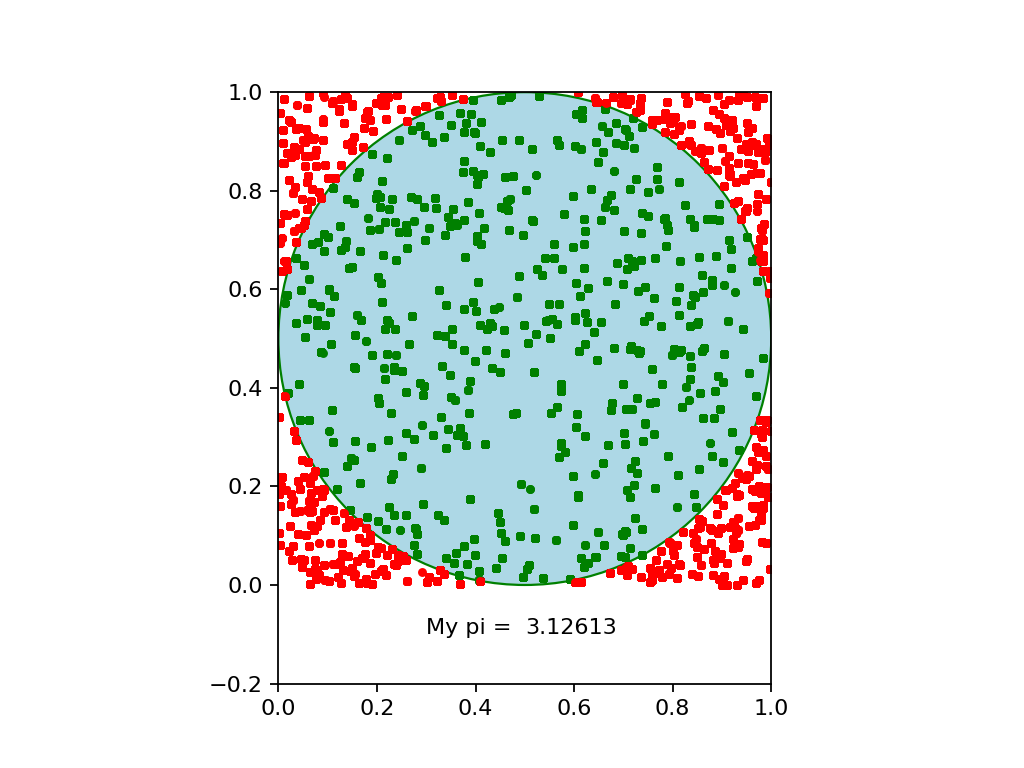

In [33]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook
%matplotlib notebook

fig, ax = plt.subplots()

plt.text(0.3,-0.1,"My pi = ") 
text_pi= plt.text(0.5,-0.1,"") 

circle = plt.Circle( (0.5,0.5 ),0.5, fc='lightblue',ec="green" )
ax.add_patch( circle )

points_inside =[[x,y] for [x,y] in points if (abs(x-0.5)**2 + abs(y-0.5)**2) <= 0.5**2]
points_outside = [[x,y] for [x,y] in points if (abs(x-0.5)**2 + abs(y-0.5)**2) > 0.5**2]


def my(frame_num):
    plt.plot(*zip(*points_inside[:frame_num]), marker='.', color='green',ls='')
    plt.plot(*zip(*points_outside[:frame_num]), marker='.', color='red',ls='')
    inside = len([[x,y] for [x,y] in points[0:frame_num*100] if (abs(x-0.5)**2 + abs(y-0.5)**2) <= 0.5**2])
    outside = len([[x,y] for [x,y] in points[0:frame_num*100] if (abs(x-0.5)**2 + abs(y-0.5)**2) > 0.5**2])
    my_pi = inside/(frame_num*100 if frame_num != 0 else 1) / (0.5**2)
    text_pi.set_text(float("{:.5f}".format(my_pi)))
    
    
anim = FuncAnimation(fig, my, frames=10000, interval=10)
plt.axis('scaled')
plt.ylim([-0.2, 1])
plt.xlim([0, 1])
plt.show()